# K-Means Clustering on a Multi-Class and Multi-Label Data Set
Ruotian Jiang
8389636738

# a

In [77]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from gap_statistic import OptimalK
from imblearn.over_sampling import SMOTE

df = pd.read_csv('Frogs_MFCCs.csv',delimiter=',') 
def norm(df):
    df_norm = (df - df.mean()) / (df.max() - df.min())
    return df_norm
# normalize the value of features
train = norm(df.iloc[:,0:22]).values
y_true=df.iloc[:,22:25]

# I will choose Gap Statistics to get the best value of K
this package is used to calculate the gap statistic which is developed by Tibshirani, Walther, Hastie to suggest n_clusters.

Optimal clusters:  8


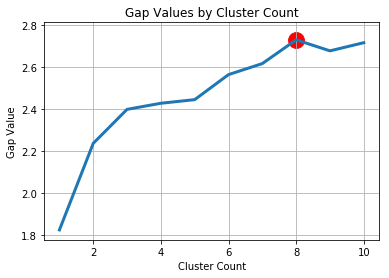

In [78]:

optimalK = OptimalK(parallel_backend='None')

n_clusters = optimalK(train, cluster_array=np.arange(1,11))
print('Optimal clusters: ', n_clusters)
optimalK.gap_df.head()

plt.plot(optimalK.gap_df.n_clusters, optimalK.gap_df.gap_value, linewidth=3)
plt.scatter(optimalK.gap_df[optimalK.gap_df.n_clusters == n_clusters].n_clusters,
            optimalK.gap_df[optimalK.gap_df.n_clusters == n_clusters].gap_value, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.show()



# b

In [79]:
# Now that we have the optimal clusters, n, we build our own KMeans model...
km = KMeans(n_clusters)
km.fit(train)
print (km.labels_)
print (km.cluster_centers_)
print (y_true.iloc[:,0])

[3 3 3 ... 3 3 3]
[[ 6.35643300e-03 -5.11387955e-03 -7.65436631e-02  6.57186443e-02
   4.60227640e-02 -4.96424936e-02 -7.46848788e-02  3.87327036e-02
   1.06623139e-01  6.65631282e-04 -1.16363968e-01  7.81264532e-03
   1.22037393e-01 -1.79666685e-02 -1.26847506e-01 -4.70423968e-03
   1.09311042e-01  3.36591791e-02 -2.77340574e-02 -1.14385781e-01
  -2.29383571e-02  1.41326709e-01]
 [ 1.71736262e-04  2.12549558e-05 -1.68276445e-01 -1.68600935e-01
  -1.85746586e-02  5.30201226e-02  1.46682563e-01  3.62485202e-02
  -2.06173956e-01 -6.34890628e-02  1.36917462e-01 -6.80712645e-02
  -1.59013754e-01  1.31804458e-01  1.41198020e-01 -1.24372595e-01
  -1.54838527e-01  1.93205200e-02  2.34927930e-02 -4.08212776e-03
  -2.00672621e-02 -5.94975851e-02]
 [-2.01834679e-02  2.07788091e-01  2.97969540e-01 -3.21074613e-02
  -1.16892296e-01  4.76596387e-02  1.97094637e-02  1.02099264e-01
   3.15228805e-02 -1.69617733e-01  6.66224769e-02  1.95398310e-01
  -1.64549655e-01 -1.42192899e-01  2.26147584e-01  4.0

# family

In [101]:
d = {0: [],1: [], 2: [],3: [],4: [],5: [],6: [],7: []}

In [102]:
family = y_true.iloc[:,0].values
label = km.labels_

for i in range(8):
    index = np.where(label==i)[0]
    unique, counts = np.unique(family[index], return_counts=True)
    compare = dict(zip(unique, counts))
    print('when label is %s:  %s ' %(i,max(compare, key=compare.get)))
    print (dict(zip(unique, counts)))
    d[i].append(max(compare, key=compare.get))

when label is 0:  Leptodactylidae 
{'Leptodactylidae': 2234, 'Hylidae': 56}
when label is 1:  Dendrobatidae 
{'Dendrobatidae': 287, 'Leptodactylidae': 49, 'Hylidae': 25, 'Bufonidae': 2}
when label is 2:  Hylidae 
{'Leptodactylidae': 6, 'Hylidae': 484, 'Bufonidae': 2}
when label is 3:  Leptodactylidae 
{'Dendrobatidae': 245, 'Leptodactylidae': 257, 'Hylidae': 137}
when label is 4:  Leptodactylidae 
{'Leptodactylidae': 244, 'Hylidae': 210, 'Bufonidae': 2}
when label is 5:  Leptodactylidae 
{'Leptodactylidae': 1232, 'Hylidae': 27}
when label is 6:  Hylidae 
{'Dendrobatidae': 10, 'Leptodactylidae': 17, 'Hylidae': 1212, 'Bufonidae': 57}
when label is 7:  Leptodactylidae 
{'Leptodactylidae': 381, 'Hylidae': 14, 'Bufonidae': 5}


# genus

In [103]:
genus = y_true.iloc[:,1].values
label = km.labels_

for i in range(8):
    index = np.where(label==i)[0]
    unique, counts = np.unique(genus[index], return_counts=True)
    compare = dict(zip(unique, counts))
    print('when label is %s:  %s ' %(i,max(compare, key=compare.get)))
    print (dict(zip(unique, counts)))
    d[i].append(max(compare, key=compare.get))

when label is 0:  Adenomera 
{'Dendropsophus': 51, 'Hypsiboas': 5, 'Adenomera': 2234}
when label is 1:  Ameerega 
{'Scinax': 1, 'Dendropsophus': 24, 'Ameerega': 287, 'Adenomera': 49, 'Rhinella': 2}
when label is 2:  Hypsiboas 
{'Osteocephalus': 26, 'Hypsiboas': 451, 'Rhinella': 2, 'Adenomera': 6, 'Scinax': 7}
when label is 3:  Adenomera 
{'Scinax': 19, 'Dendropsophus': 118, 'Leptodactylus': 6, 'Ameerega': 245, 'Adenomera': 251}
when label is 4:  Leptodactylus 
{'Osteocephalus': 67, 'Hypsiboas': 141, 'Rhinella': 2, 'Scinax': 2, 'Leptodactylus': 235, 'Adenomera': 9}
when label is 5:  Adenomera 
{'Scinax': 1, 'Dendropsophus': 19, 'Hypsiboas': 7, 'Adenomera': 1232}
when label is 6:  Hypsiboas 
{'Osteocephalus': 19, 'Dendropsophus': 97, 'Hypsiboas': 981, 'Rhinella': 57, 'Scinax': 115, 'Leptodactylus': 14, 'Ameerega': 10, 'Adenomera': 3}
when label is 7:  Adenomera 
{'Osteocephalus': 2, 'Dendropsophus': 1, 'Hypsiboas': 8, 'Rhinella': 5, 'Scinax': 3, 'Leptodactylus': 15, 'Adenomera': 366}


#  species

In [104]:
species = y_true.iloc[:,2].values
label = km.labels_

for i in range(8):
    index = np.where(label==i)[0]
    unique, counts = np.unique(species[index], return_counts=True)
    compare = dict(zip(unique, counts))
    print('when label is %s:  %s ' %(i,max(compare, key=compare.get)))
    print (dict(zip(unique, counts)))
    d[i].append(max(compare, key=compare.get))

when label is 0:  AdenomeraHylaedactylus 
{'AdenomeraHylaedactylus': 2234, 'HypsiboasCordobae': 5, 'HylaMinuta': 51}
when label is 1:  Ameeregatrivittata 
{'Rhinellagranulosa': 2, 'ScinaxRuber': 1, 'HylaMinuta': 24, 'Ameeregatrivittata': 287, 'AdenomeraHylaedactylus': 4, 'AdenomeraAndre': 45}
when label is 2:  HypsiboasCinerascens 
{'Rhinellagranulosa': 2, 'ScinaxRuber': 7, 'HypsiboasCinerascens': 441, 'OsteocephalusOophagus': 26, 'AdenomeraHylaedactylus': 3, 'HypsiboasCordobae': 10, 'AdenomeraAndre': 3}
when label is 3:  AdenomeraAndre 
{'ScinaxRuber': 19, 'Ameeregatrivittata': 245, 'LeptodactylusFuscus': 6, 'HylaMinuta': 118, 'AdenomeraAndre': 251}
when label is 4:  LeptodactylusFuscus 
{'Rhinellagranulosa': 2, 'LeptodactylusFuscus': 235, 'HypsiboasCinerascens': 21, 'OsteocephalusOophagus': 67, 'AdenomeraHylaedactylus': 2, 'HypsiboasCordobae': 120, 'ScinaxRuber': 2, 'AdenomeraAndre': 7}
when label is 5:  AdenomeraHylaedactylus 
{'ScinaxRuber': 1, 'AdenomeraHylaedactylus': 1232, 'Hyps

In [105]:
print (d)

{0: ['Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus'], 1: ['Dendrobatidae', 'Ameerega', 'Ameeregatrivittata'], 2: ['Hylidae', 'Hypsiboas', 'HypsiboasCinerascens'], 3: ['Leptodactylidae', 'Adenomera', 'AdenomeraAndre'], 4: ['Leptodactylidae', 'Leptodactylus', 'LeptodactylusFuscus'], 5: ['Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus'], 6: ['Hylidae', 'Hypsiboas', 'HypsiboasCordobae'], 7: ['Leptodactylidae', 'Adenomera', 'AdenomeraAndre']}


# c : the average Hamming distance

In [115]:
#  the labels assigned by clusters.
clusters_labels = [d[index] for index in label]
clusters_labels = np.array(clusters_labels)
print (clusters_labels)
print (y_true.values)

[['Leptodactylidae' 'Adenomera' 'AdenomeraAndre']
 ['Leptodactylidae' 'Adenomera' 'AdenomeraAndre']
 ['Leptodactylidae' 'Adenomera' 'AdenomeraAndre']
 ...
 ['Leptodactylidae' 'Adenomera' 'AdenomeraAndre']
 ['Leptodactylidae' 'Adenomera' 'AdenomeraAndre']
 ['Leptodactylidae' 'Adenomera' 'AdenomeraAndre']]
[['Leptodactylidae' 'Adenomera' 'AdenomeraAndre']
 ['Leptodactylidae' 'Adenomera' 'AdenomeraAndre']
 ['Leptodactylidae' 'Adenomera' 'AdenomeraAndre']
 ...
 ['Hylidae' 'Scinax' 'ScinaxRuber']
 ['Hylidae' 'Scinax' 'ScinaxRuber']
 ['Hylidae' 'Scinax' 'ScinaxRuber']]


In [2]:
def hamming_d(y_true, y_pred):
    count = 0 
    for i in range(y_true.shape[0]):
        if (y_true[i][1] != y_pred[i][1]) :
            count+=1
        if (y_true[i][0] != y_pred[i][0]) :
            count+=1
        if (y_true[i][2] != y_pred[i][2]) :    
            count+=1
    return count
distance = hamming_d(y_true.values, clusters_labels)
number = y_true.values.shape[0]
print ('total hamming distance:')
print (distance)
print ('total count')
print (number)
print ('average distance')
print (distance/number)

total hamming distance:
3193
total count
7195
average distance
0.44378040305767896


# (d) Extra Practice: